<a href="https://colab.research.google.com/github/ruiwen829/Generate-Trump-like-Tweets/blob/master/Generate_Trump_like_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop: Analysing Trump's Tweets
## Author: Ruiwen Zhang

Questions/objectives:
* How does President Trump feel about Bernie Sanders?
* How might we produce Trump-like Tweets?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part I: Trump v. Sanders



## 1 - Data ##
We first get the data into our Google Colab environment from a Github repository.



> ---
> *More on this*
>
> Github is a standard tool used by software developers and computer programmers of all types that makes it easy to share, update and keep track of code. It is used accross industry and academia for both personal and team-oriented projects.
>
> The Github repository for this project [Generate-Trump-like-Tweets](https://github.com/ruiwen829/Generate-Trump-like-Tweets) simply contains the data (and some model weights) for this workshop. 

> ---

In [1]:
# This is a code cell--we can execute Python code here.
# Note that lines in the coding cells that start with '#' are comments and not interpretted as computer code.
# They are great for explaining what your code is doing in plain English!
# Also note the line below starts with '!'--these lines are interpretted as shell commands.
!git clone https://github.com/ruiwen829/Generate-Trump-like-Tweets

Cloning into 'Generate-Trump-like-Tweets'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 3), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


The data is now in our environment. Confirm that it's in its proper place by clicking the folder on the left-hand side of the screen and checking what was exactly copied before continuing (you should be able to find a file called 'trumpstweets.csv' in the 'data' folder).

Python allows for users to use *libraries* (groups of related functions) created by the community. In fact, libraries are one of the reasons Python is so widely used! There is a vast body of great libraries that Python programmer rely on regularly.

## 2 - Packages ##

Let's then import all the packages that you will need during this workshop.
- [pandas](https://pandas.pydata.org/) is a data analysis and manipulation tool, built on top of the Python programming language
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- [textblob](https://textblob.readthedocs.io/en/dev/) is a library for processing textual data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

Note that we import each of the libraries as something else. This is for clarity and faster development. Now, we can use the shorthand 'plt' to refer to 'matplotlib.pyplot' (which is quite annoying to type out!).

We noted that [pandas](https://pandas.pydata.org/) is our go-to library for handling our data. We will use its `read_csv()` function to read in our raw data. Use this function to set a variable *df* to hold our data. 


To find the data file, look through the 
directory on the left-hand side of the screen. Remember that filepath's take the format: folder1/folder2/ another_folder/my_data.txt.

Recall that we won't use the full keyword  `pandas` when refering to the library, but rather the shorthand we defined when importing the library.

 ---
 *More on this*

 Pandas stores data in what it called DataFrame. You can think of it as a well-organized table or matrix of data.

 ---

One convenient way to see what a variable holds is by simple typing the variable's name as it's own line of code at the end of a code cell. After setting the variable, let's check what the content of df are by doing this.

In [4]:
df = pd.read_csv('/content/Generate-Trump-like-Tweets/data/trumptweets.csv')
df

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


You've successfully loaded the data into Python! What does the data look like? What different information does it contain (and which of these are we primarily interested in)? How many samples does the data contain?

Let's now extract our desired information, *contents*. Set a variable to just contain this information by indexing into *df* using square brckets, [ ]. Note that you will have to use quotes, " ", around the column name when indexing. Put the contents in a variable called *contents*.

After you've done this, let's try to see how Trump feels about some democrats, say Bernie Sanders. We can search the contents for occurances of 'Bernie' and only look at those Tweets (we have done this for you in the variable called *bernies*).

In [ ]:
# extracts the "content" column of 'df' and puts it into the variable 'content' 
contents = df["content"]

In [ ]:
# finds all occurances of "Bernie" and stores in 'bernies'
idx = contents.str.find("Bernie") != -1
bernies = df[idx]

Let's now apply \~machine learning\~ methods to do some *sentiment analysis*. In this case, that's finding out how Trump feels about Bernie.

Specifically, in our TextBlob library, there are two ways we are going to understand each Tweet's sentiment: _polarity_ ($\in [-1,1]$) and _subjectivity_ ($\in [0,1]$).

Part of the code has been written for you. We will be *iterating* over each of the Tweets regarding Bernie, and then calling the `sentiment.polarity` and `sentiment.subjectivity` methods to get these two relevant quantities (click [textblob](https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.TextBlob.sentiment) for documentation).

Let's store these values in a different column of *bernies*: *sentiment_polarity* and *sentiment_subjectivity*. To create a new column in our DataFrame, read the documentation of the _.loc_ method in [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) documentation.


In [ ]:
# apply sentiment analysis to Bernie-related Tweets
for idx, row in bernies.iterrows():
  single_tweet = TextBlob(row.content)
  bernies.loc[idx, "sentiment_polarity"] = single_tweet.sentiment.polarity
  bernies.loc[idx, "sentiment_subjectivity"] = single_tweet.sentiment.subjectivity

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Now our _bernies_ DataFrame also contains values for Trump's sentiment! Let's compute some basic quantities of interest for these data. Specifically, print out the mean value and standard deviation of the _sentiment_polarity_ column we just created. Additionally, quickly plot a histogram of the values using _plt.hist()_ (note: call _plt.show()_ to show the plot). Repeat this for the _sentiment_subjectivity_ column.

Polarity: Mean: -0.037951
Std: 0.307511


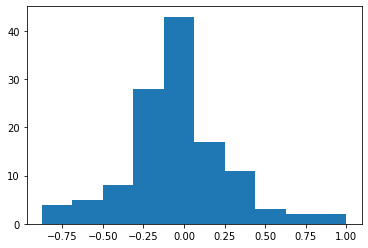

Subjectivity: Mean: 0.460923
Std: 0.262217


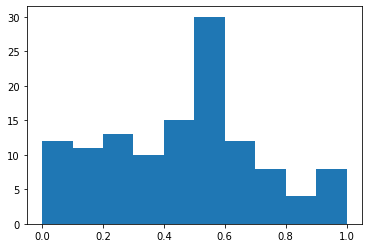

In [ ]:
# basic statistics and plot
print("Polarity: Mean: %f\nStd: %f" % (bernies["sentiment_polarity"].mean(), bernies["sentiment_polarity"].std()))
plt.hist(bernies["sentiment_polarity"])
plt.show()

print("Subjectivity: Mean: %f\nStd: %f" % (bernies["sentiment_subjectivity"].mean(), bernies["sentiment_subjectivity"].std()))
plt.hist(bernies["sentiment_subjectivity"])
plt.show()

Which way is the distribution skewed (are there a lot of Tweets to the far left/very negative or the far right/very positive)? What is the average (how does Trump feel, on average, about Bernie)?

## Part II: Generating Trump-like Tweets
Now let's have some fun! An exciting part of AI research is figuring out how machines can _generate_ content that seems like it was produced by a human. In this section, we generate Trump-like Tweets using _textgenrnn_, a library for processing (and creating) texts.

This part is suppose to be fun, so we've done most of the heavy lifting for you. That is, we're trained a model on Trump's Tweets and now we can call on it to generate things that look like something our president would send out.

In [8]:
# install package for the lastest version (must)

In [ ]:
pip install git+https://github.com/minimaxir/textgenrnn

In [10]:
from textgenrnn import textgenrnn
textgen = textgenrnn(name="trump_model_epoch12")

In [11]:
import re
text = [re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) for text in df['content'].values.tolist()]

In [ ]:
textgen.train_on_texts(text,
                        word_level=True, 
                        new_model=True,
                        rnn_bidirectional=True,
                        rnn_layers=4,
                        rnn_size=128,
                        dim_embeddings=300,
                        max_length=20,
                        num_epochs=12)
#textgen.generate()

Training new model w/ 4-layer, 128-cell Bidirectional LSTMs
Training on 1,235,343 word sequences.
Epoch 1/12
9651/9651 [==============================] - ETA: 0s - loss: 4.0448####################
Temperature: 0.2
####################
"@:@ realdonaldtrump@@@@ foxnews@ megynkelly@ oreillyfactor@ foxnews@ foxnews@ seanhannity@ foxnews

"@:@ realdonaldtrump@@@@@ megynkelly@ oreillyfactor@ foxnews@ megynkelly@ oreillyfactor@ foxnews

"@:@ realdonaldtrump@@@@@ foxnews@ megynkelly@ oreillyfactor@ foxnews@ seanhannity@ foxnews

####################
Temperature: 0.5
####################
"@:@ realdonaldtrump@@@ foxnews mr trump is the best of the best golf course in the uk. "

"@:@ realdonaldtrump i'm a fan of the best..............

"@:@ realdonaldtrump@@@@@ apprenticenbc trump is a special place! "

####################
Temperature: 1.0
####################
general john kelly is a tremendous last joseph supporter.. go order to get tough, military, vets, military, vets, senate, and the democra

In [14]:
# textgen2 = textgenrnn(weights_path='/content/Generate-Trump-like-Tweets/trump_epoch12_weights.hdf5',
#                       vocab_path = '/content/Generate-Trump-like-Tweets/trump_epoch12_vocab.json',
#                       config_path = '/content/Generate-Trump-like-Tweets/trump_epoch12_config.json')


We can now call the _.generate()_ method to generate Tweets. We can call _help()_ to see some of its arguments.

Two fun thing's to play with are `temperature`, which controls how _creative_ the model will be, and `prefix`, which allows you to force the model to start the generated text with specified text. Play around with these settings and see what you get!

In [ ]:
help(textgen.generate)

Help on method generate in module textgenrnn.textgenrnn:

generate(n=1, return_as_list=False, prefix=None, temperature=[1.0, 0.5, 0.2, 0.2], max_gen_length=300, interactive=False, top_n=3, progress=True) method of textgenrnn.textgenrnn.textgenrnn instance



In [ ]:
textgen.generate(n=5, temperature = 0.5, prefix = "China")

 20%|██        | 1/5 [00:03<00:14,  3.60s/it]

china has just to lower the yuan - an “ “ give ” the money they paid. the federal reserve is back. their dollar is no strongest, it is no........



 40%|████      | 2/5 [00:04<00:08,  2.77s/it]

china has been asked to develop a much $3. when it comes to a larger screen iphone. they have...



 60%|██████    | 3/5 [00:05<00:04,  2.14s/it]

china has been taking over the country, they were so great for our farmers and so many others!



 80%|████████  | 4/5 [00:05<00:01,  1.72s/it]

china has a business tax rate of 15. we should lower the price of oil immediately & gas....



100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

china is now attacking japan and other military to invest in their country and other countries. this is more than the democrats in congress, or to interfere in our good & hopefully will be a powerful shake........



In [ ]:
textgen.generate(n = 2, prefix = "China",temperature = [0.5, 1])

 50%|█████     | 1/2 [00:01<00:01,  1.12s/it]

china just announced that they were trying to do their best. they do not continue to “, ” and neither does. would love to do something done. don t fall!



100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

china dropped out of the military and other plans to build military and everything they up in is that our economy has never moved our countries....

